<a href="https://colab.research.google.com/github/iasminqmoura/ia_2023/blob/main/Lista_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisão do Treino: 99.30%
Precisão do Teste: 100.00%


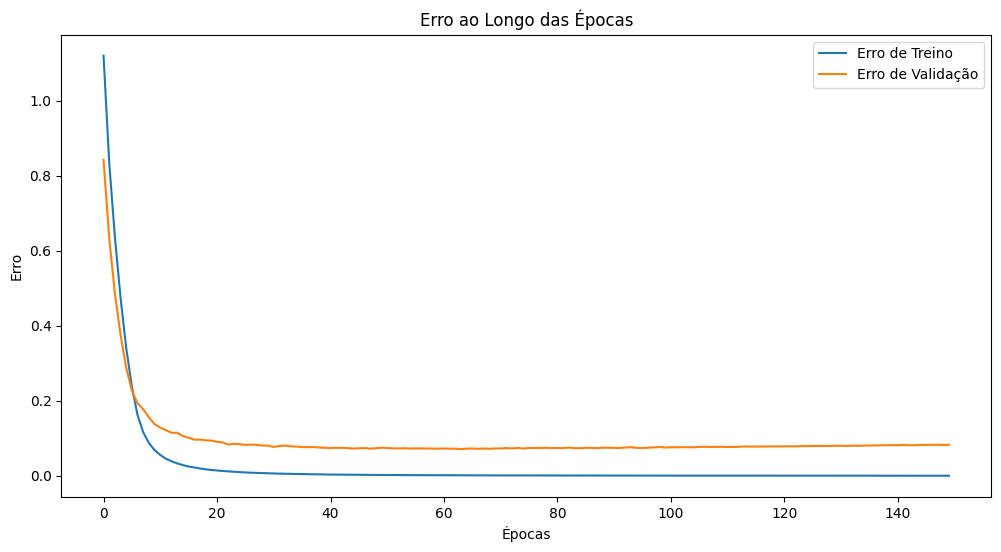

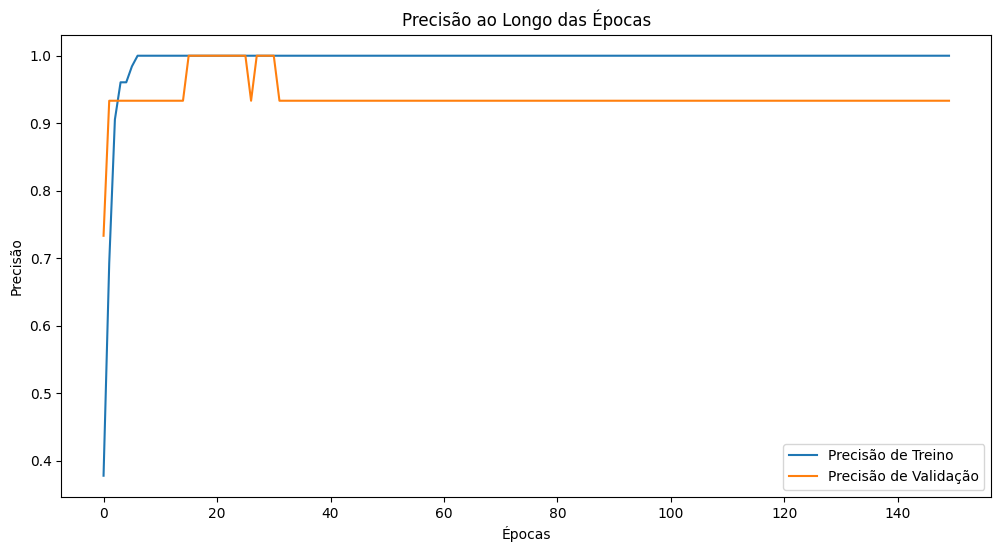

2/2 [==============================] - 0s 9ms/step


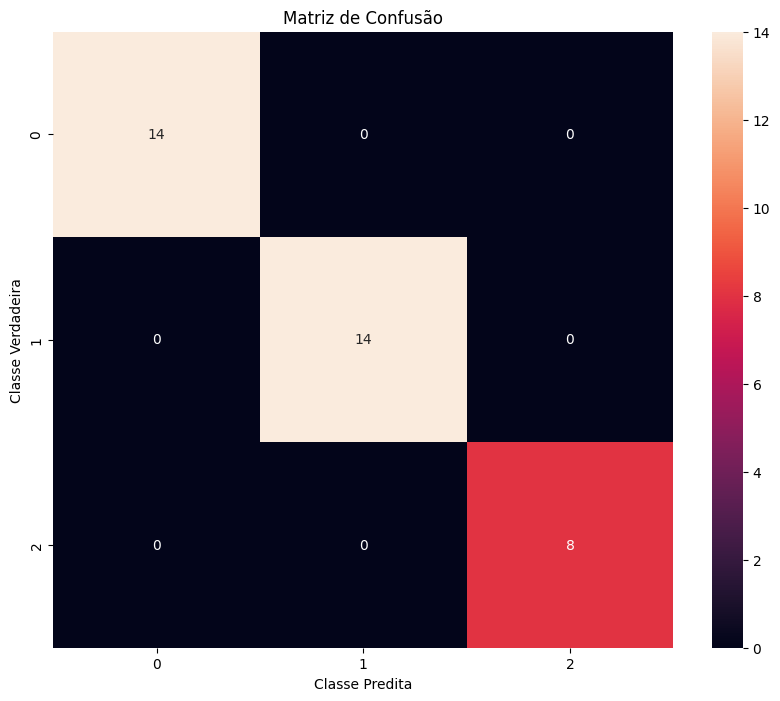

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

dados_vinho = pd.read_csv('wine.csv', header=None)

X = dados_vinho.iloc[:, 1:].values
y = dados_vinho.iloc[:, 0].values

codificador = LabelEncoder()
y_codificado = codificador.fit_transform(y)
y_categorico = to_categorical(y_codificado)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y_categorico, test_size=0.2, random_state=42)

normalizador = StandardScaler()
X_treino = normalizador.fit_transform(X_treino)
X_teste = normalizador.transform(X_teste)

modelo = Sequential()
modelo.add(Dense(64, input_dim=X_treino.shape[1], activation='relu'))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(y_categorico.shape[1], activation='softmax'))

modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

historico = modelo.fit(X_treino, y_treino, validation_split=0.1, epochs=150, batch_size=10, verbose=0)

_, precisao_treino = modelo.evaluate(X_treino, y_treino, verbose=0)
_, precisao_teste = modelo.evaluate(X_teste, y_teste, verbose=0)
print(f'Precisão do Treino: {precisao_treino*100:.2f}%')
print(f'Precisão do Teste: {precisao_teste*100:.2f}%')

plt.figure(figsize=(12, 6))
plt.plot(historico.history['loss'], label='Erro de Treino')
plt.plot(historico.history['val_loss'], label='Erro de Validação')
plt.title('Erro ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(historico.history['accuracy'], label='Precisão de Treino')
plt.plot(historico.history['val_accuracy'], label='Precisão de Validação')
plt.title('Precisão ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.legend()
plt.show()

previsoes = modelo.predict(X_teste)
previsoes_classes = np.argmax(previsoes, axis=1)
y_teste_classes = np.argmax(y_teste, axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz_confusao = confusion_matrix(y_teste_classes, previsoes_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusao, annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()
